  # Exploratory Data Analysis on Netflix Dataset
 
 

**Introduction**

The dataset used for the Netflix data analytics task consists of TV shows and movies streamed on Netflix as of 2019. The dataset is downloaded from Kaggle.


**Objective**

In this dataset I’ve performed some Exploratory Data analysis to find some hidden trends and patterns.Loaded and read the data using pandas, done some cleaning and Processing of data and explored the dataset through visualizations and graphs using matplotlib and seaborn and finally answered some questions related to dataset.

**Outline Of the Project**


1. **Import and Install required libraries**

2. **Download and Load the Dataset**

3. **Data Preparation and Cleaning**

4. **Ask and answer questions about the data through visualization**

5. **Summarize and write a conclusion**

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


**Loading the dataset**

In [3]:
df=pd.read_csv(r'C:\Users\shweta\Downloads\archive (19)\netflix_titles.csv')

**Data overview**

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Shape of the dataset**

In [5]:
df.shape

(8807, 12)

In [6]:
df.size

105684

**Columns of the dataset**

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Information of the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


**Duplicates values**

In [10]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


**Number of null values per coloumn**

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Cleaning

**Fill in missing values**

In [12]:
df.director.fillna('None',inplace=True)
df.cast.fillna('None',inplace=True)
df.country.fillna('None',inplace=True)


**Dropping missing values**

In [13]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

**Converting data type**

In [15]:
df['release_date']= pd.to_datetime(df['date_added'])

In [16]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
release_date    datetime64[ns]
dtype: object

In [17]:
df['release_date'].dt.year.value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1186
2016     428
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: release_date, dtype: int64

# Exploratory Data Analysis and Visualization



**Movies & TV shows Ratings**

In [52]:
plt.style.use('seaborn')

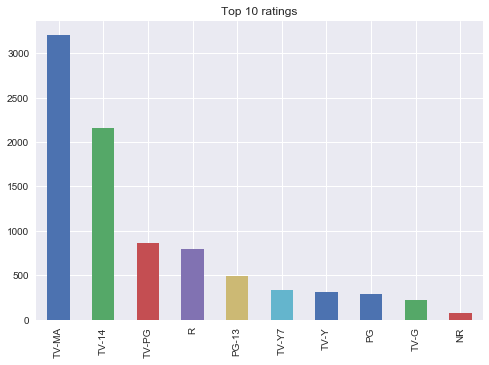

In [53]:
df.rating.value_counts().head(10).plot(kind='bar',title='Top 10 ratings')

**Number of Content in last 10 Years**

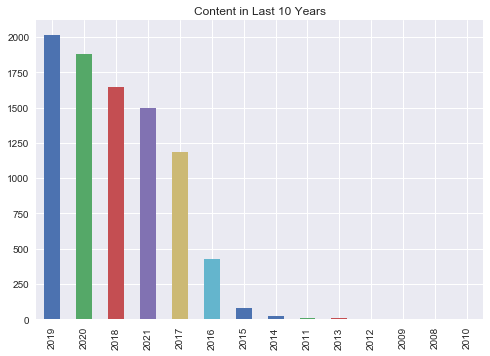

In [54]:
df['release_date'].dt.year.value_counts().plot(kind='bar',title='Content in Last 10 Years')

**Number of Movies & TV Shows**

In [20]:
df.groupby('type').type.count()

type
Movie      6129
TV Show    2664
Name: type, dtype: int64

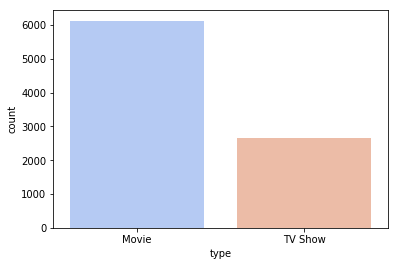

In [30]:
sns.countplot(df['type'],palette='coolwarm')

In [ ]:
df['year'] = df['release_date'].dt.year

**Top 10 Genres by number of title**

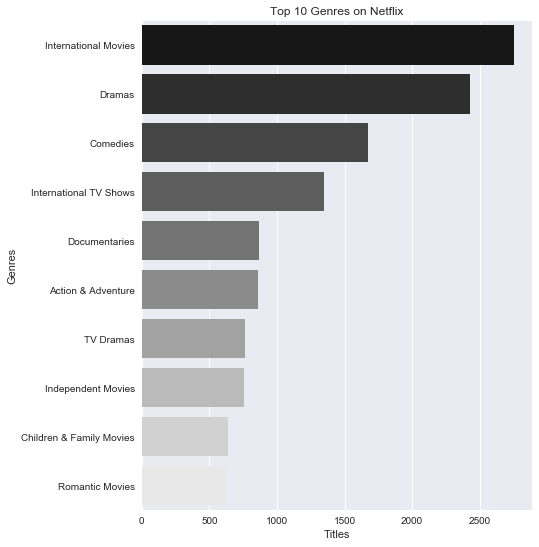

In [55]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack();

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10],palette='gray')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**Top 10 countries by title**

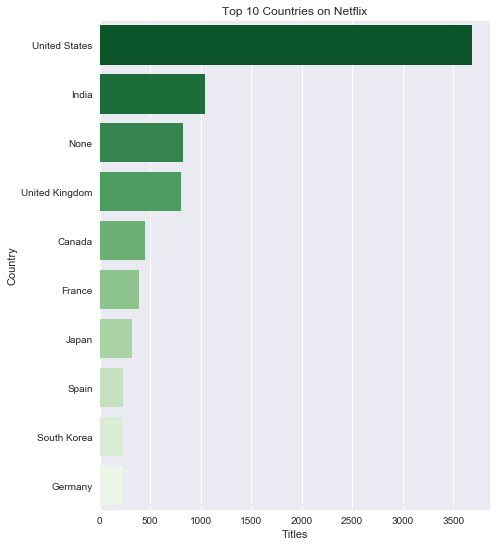

In [56]:
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack();


plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10],palette='Greens_r')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

**Top 10 cast by number of titles**

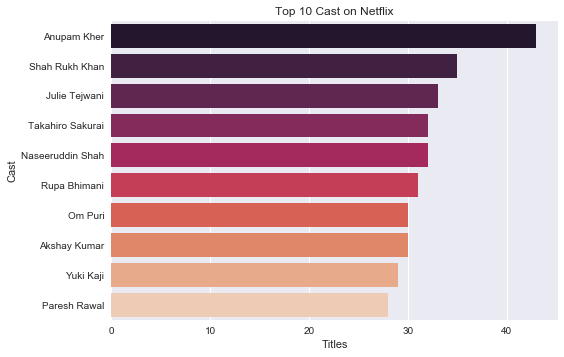

In [57]:
filtered_cast = df[df.cast!= 'None'].set_index('title').cast.str.split(', ', expand=True).stack()
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Cast on Netflix')
plt.xlabel('Titles')
plt.ylabel('Cast')


plt.show()


**Top 10 directors by number of title**

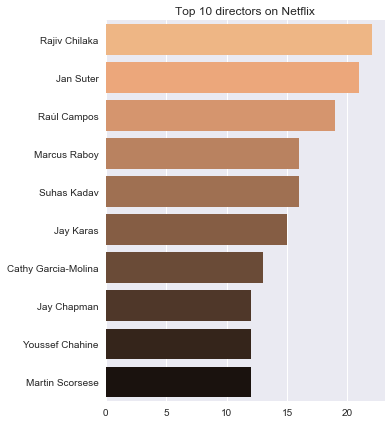

In [58]:
filtered_director = df.set_index('title').director.str.split(', ', expand=True).stack()
filtered_director = filtered_director[filtered_director != 'None']


plt.figure(figsize=(5,7))
g = sns.countplot(y =filtered_director , order=filtered_director.value_counts().index[:10],palette='copper_r')
plt.title('Top 10 directors on Netflix')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Inferences and Conclusion



1.	The most content type on Netflix is movies.


2.	Largest count of Netflix content is made with a “TV-14” rating.


3. The number of content titles on Netflix continued to increase from 2012 to 2019.


4.	International Movies is a genre that is most popular on Netflix.


5.	The country which produces the most content on Netflix is the United States with 3,500++ content titles production.


6.	The most popular actor on Netflix, based on the number of titles, is Anupam Kher.


7.	The most popular director on Netflix  with the most titles, is Rajiv Chilaka who has directed 20++ number of content titles on Netflix.

